<a href="https://colab.research.google.com/github/diegoBarriaevolet/Diagrama-de-Flujo-evolet/blob/main/Proyecto_OSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd

# Subir archivo desde tu computador en Colab
from google.colab import files
uploaded = files.upload()

# Leer el archivo subido
df = pd.read_csv('data_sciense_cabritas.csv')  # Cambia el nombre si tu archivo es diferente
df.head()


Saving data_sciense_cabritas.csv to data_sciense_cabritas (1).csv


,Producto,form_name,form_state,user_name,deleted,Hora,Disponibilidad,Precio,Local,Nombre_Form,...,Revisar,Reintegrar,CONCA VENDOR,Check_blanco,Empresa,Bloqueo_datos,Columna calculada 1,Maestra_FILTRA,CAMBIO,Supervisor
0,CARAMELO 161 G,Reporte ACT II,NaN,Catalina Varela,False,10:56:38,1.0,0,JUMBO LOS TRAPENSES (L.762),NaN,...,1,NaN,J762JUACT II,0,BLUE SOUTH,NaN,1.0,GONZALO MOLINA ESPOSA,NaN,GONZALO MOLINA ESPOSA
1,DULCE 91GR,Reporte ACT II,NaN,Catalina Varela,False,10:56:38,1.0,0,JUMBO LOS TRAPENSES (L.762),NaN,...,1,NaN,J762JUACT II,0,BLUE SOUTH,NaN,1.0,GONZALO MOLINA ESPOSA,NaN,GONZALO MOLINA ESPOSA
2,LIGHT MANTEQUILLA 85 G,Reporte ACT II,NaN,Catalina Varela,False,10:56:38,1.0,0,JUMBO LOS TRAPENSES (L.762),NaN,...,1,NaN,J762JUACT II,0,BLUE SOUTH,NaN,1.0,GONZALO MOLINA ESPOSA,NaN,GONZALO MOLINA ESPOSA
3,MANTEQUILLA 91GR,Reporte ACT II,NaN,Catalina Varela,False,10:56:38,1.0,0,JUMBO LOS TRAPENSES (L.762),NaN,...,1,NaN,J762JUACT II,0,BLUE SOUTH,NaN,1.0,GONZALO MOLINA ESPOSA,NaN,GONZALO MOLINA ESPOSA
4,NATURAL 91GR (CENCO),Reporte ACT II,NaN,Catalina Varela,False,10:56:38,1.0,0,JUMBO LOS TRAPENSES (L.762),NaN,...,1,NaN,J762JUACT II,0,BLUE SOUTH,NaN,1.0,GONZALO MOLINA ESPOSA,NaN,GONZALO MOLINA ESPOSA


In [21]:
df[df['Disponibilidad'] == 0].groupby('Local').size().sort_values(ascending=False)

,0
Local,
LIDER EXPRESS TALCA (LAS RASTRAS) (L.764),178
LIDER HIPER ANTOFAGASTA (L.91),175
LIDER EXPRESS DOS SUR (L.142),175
LIDER HIPER COLIN SUCURSAL (L.143),171
SANTA ISABEL ANTOFAGASTA MAIPU (L.798),168
...,...
JUMBO BOSQUEMAR (L.739),5
UNIMARC GOMEZ CARREÑO (L.0713),4
JUMBO ARICA,3


In [20]:
df[df['Disponibilidad'] == 0].groupby('Producto').size()


,0
Producto,
CARAMELO 161 G,3426
DULCE 91GR,3517
LIGHT MANTEQUILLA 85 G,6894
MANTEQUILLA 91GR,4897
NATURAL 91GR (CENCO),7419


In [19]:
df[df['Disponibilidad'] == 0].groupby('Cadena').size()


,0
Cadena,
HIPER LIDER,6490
JUMBO,2113
LIDER EXPRESS,1075
SANTA ISABEL,16374
UNIMARC,101


In [5]:
from sklearn.preprocessing import LabelEncoder

# Seleccionar columnas relevantes
cols = ['Producto', 'Disponibilidad', 'Stock', 'Local', 'Cadena', 'Supervisor']
df_cluster = df[cols].dropna()

# Filtrar valores válidos
df_cluster = df_cluster[(df_cluster['Disponibilidad'].isin([0,1])) & (df_cluster['Stock'] >= 0)]

# Codificar variables categóricas
label_cols = ['Producto', 'Local', 'Cadena', 'Supervisor']
for col in label_cols:
    le = LabelEncoder()
    df_cluster[col] = le.fit_transform(df_cluster[col])


In [6]:
from sklearn.cluster import KMeans

# KMeans con 3 grupos (puedes cambiar el número de clústeres)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_cluster['Cluster'] = kmeans.fit_predict(df_cluster)


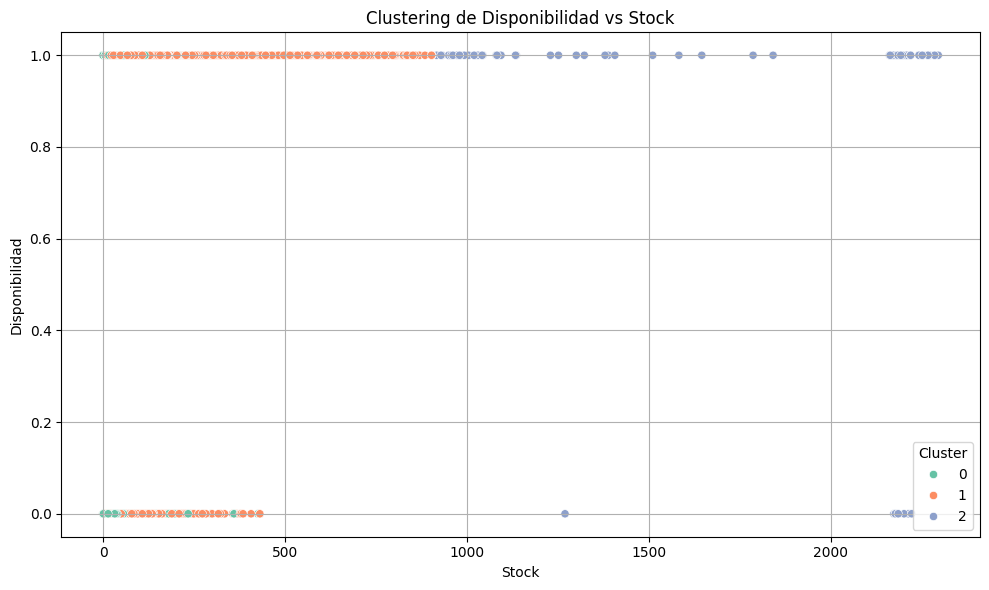

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cluster, x='Stock', y='Disponibilidad', hue='Cluster', palette='Set2')
plt.title('Clustering de Disponibilidad vs Stock')
plt.xlabel('Stock')
plt.ylabel('Disponibilidad')
plt.grid(True)
plt.tight_layout()
plt.show()


In [9]:
# Seleccionar y limpiar los datos
df_cluster = df[['Stock', 'Venta']].dropna()
df_cluster = df_cluster[(df_cluster['Stock'] >= 0) & (df_cluster['Venta'] >= 0)]

In [10]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_cluster['Cluster'] = kmeans.fit_predict(df_cluster)

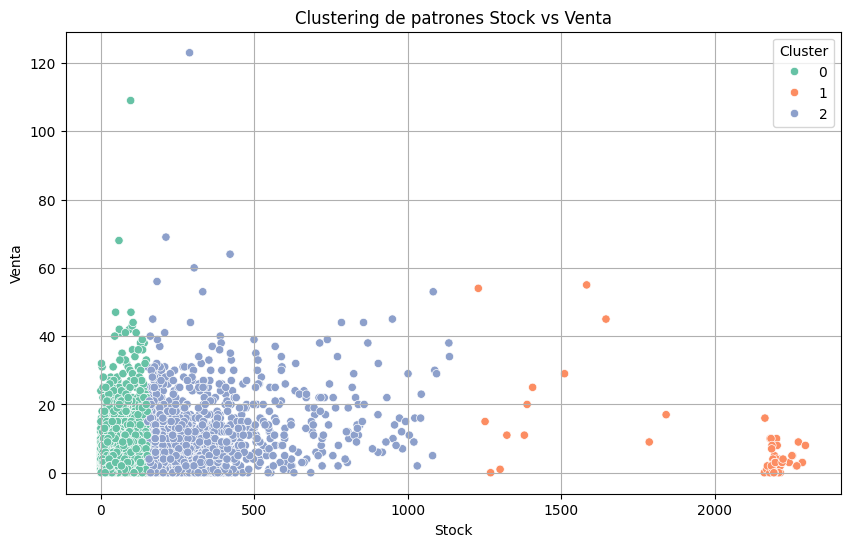

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.scatterplot(data=df_cluster, x='Stock', y='Venta', hue='Cluster', palette='Set2')
plt.title('Clustering de patrones Stock vs Venta')
plt.grid(True)
plt.show()


In [13]:
# Filtrar registros donde la disponibilidad es 0
df_disp0 = df[(df['Disponibilidad'] == 0) & (df['Stock'] >= 0)]

# Agrupar por local y calcular estadísticas de stock
stock_por_local = df_disp0.groupby('Local')['Stock'].agg(['count', 'mean', 'median', 'sum']).reset_index()

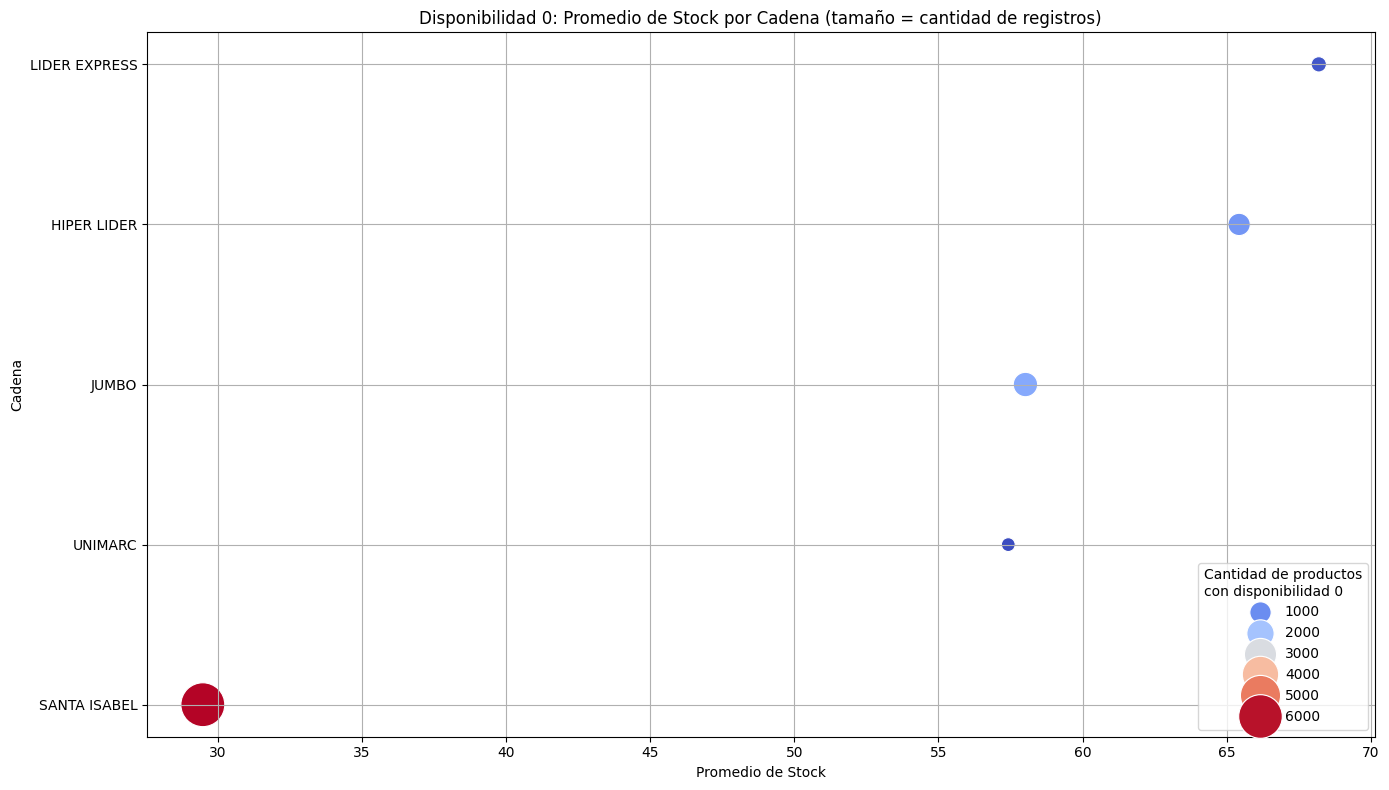

In [14]:
# Agrupar por Cadena en vez de Local
stock_por_cadena = df_disp0.groupby('Cadena')['Stock'].agg(['count', 'mean', 'median', 'sum']).reset_index()

# Ordenar por promedio de stock
stock_por_cadena = stock_por_cadena.sort_values('mean', ascending=False)

# Gráfico de burbujas
plt.figure(figsize=(14, 8))
sns.scatterplot(
    data=stock_por_cadena,
    x='mean',
    y='Cadena',
    size='count',
    hue='count',
    palette='coolwarm',
    sizes=(100, 1000),
    legend='brief'
)

plt.title('Disponibilidad 0: Promedio de Stock por Cadena (tamaño = cantidad de registros)')
plt.xlabel('Promedio de Stock')
plt.ylabel('Cadena')
plt.grid(True)
plt.legend(title='Cantidad de productos\ncon disponibilidad 0', loc='lower right')
plt.tight_layout()
plt.show()


Saving data sciense cabritas.xlsx to data sciense cabritas (1).xlsx


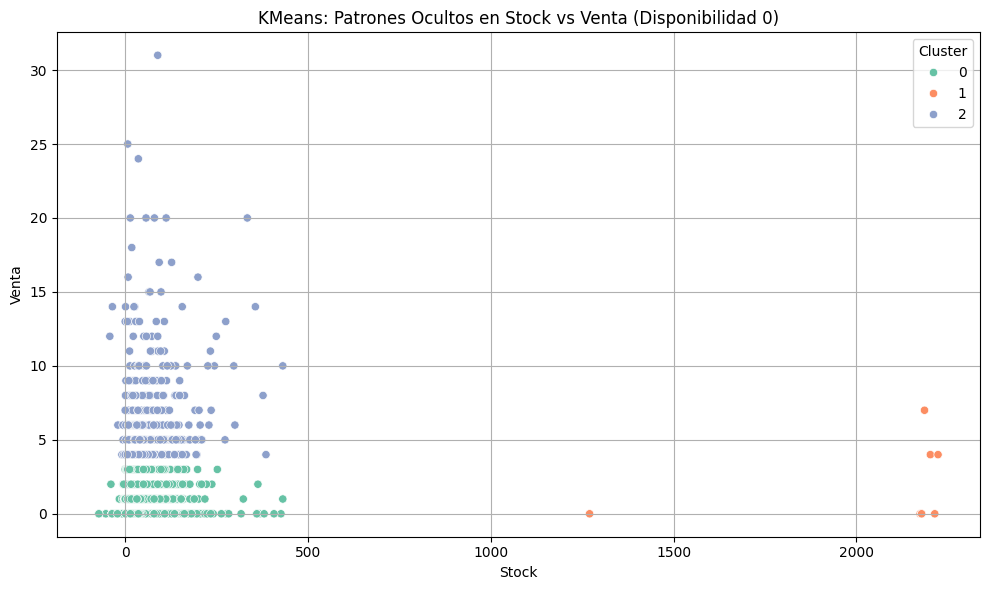

In [22]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Subir y cargar archivo
uploaded = files.upload()
df = pd.read_excel("data sciense cabritas.xlsx")

# Filtrar Disponibilidad = 0 y columnas relevantes
df_cluster = df[df['Disponibilidad'] == 0][['Stock', 'Venta']].dropna()

# Escalar para mejorar KMeans
X_scaled = StandardScaler().fit_transform(df_cluster)

# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_cluster['Cluster'] = kmeans.fit_predict(X_scaled)

# Gráfico con nombres de columnas reales
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_cluster, x='Stock', y='Venta', hue='Cluster', palette='Set2')
plt.title('KMeans: Patrones Ocultos en Stock vs Venta (Disponibilidad 0)')
plt.xlabel('Stock')
plt.ylabel('Venta')
plt.grid(True)
plt.tight_layout()
plt.show()


Saving data sciense cabritas.xlsx to data sciense cabritas (2).xlsx


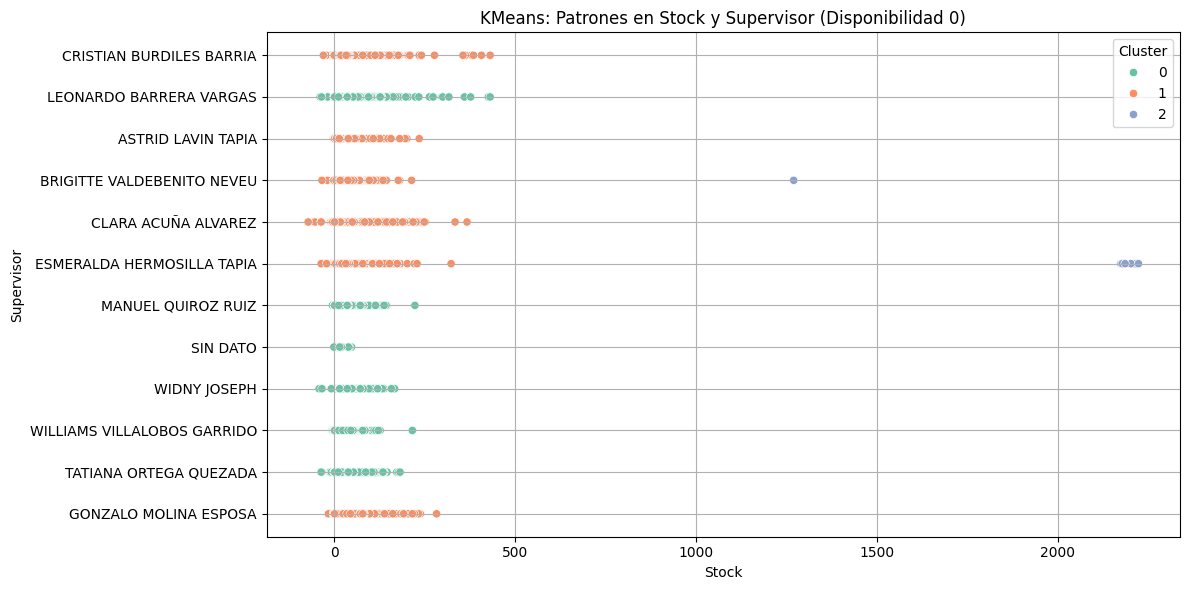

In [23]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Subir archivo
uploaded = files.upload()
df = pd.read_excel("data sciense cabritas.xlsx")

# Filtrar datos con disponibilidad 0 y columnas necesarias
df_cluster = df[df['Disponibilidad'] == 0][['Stock', 'Supervisor']].dropna()

# Codificar Supervisor
le = LabelEncoder()
df_cluster['Supervisor_encoded'] = le.fit_transform(df_cluster['Supervisor'])

# Escalar variables
X = df_cluster[['Stock', 'Supervisor_encoded']]
X_scaled = StandardScaler().fit_transform(X)

# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_cluster['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualizar con nombres reales
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_cluster, x='Stock', y='Supervisor', hue='Cluster', palette='Set2')
plt.title('KMeans: Patrones en Stock y Supervisor (Disponibilidad 0)')
plt.xlabel('Stock')
plt.ylabel('Supervisor')
plt.grid(True)
plt.tight_layout()
plt.show()


Saving data sciense cabritas.xlsx to data sciense cabritas.xlsx


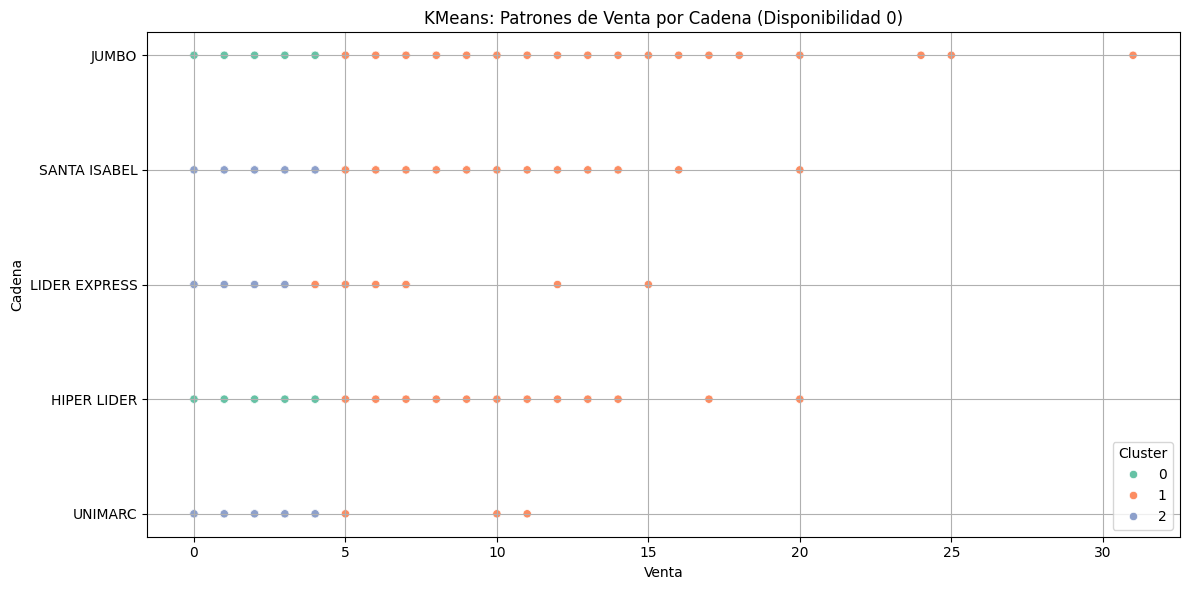

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# 📥 Subir archivo si no lo has hecho
uploaded = files.upload()
df = pd.read_excel("data sciense cabritas.xlsx")

# 🔍 Filtrar datos con Disponibilidad = 0
df_cluster = df[df['Disponibilidad'] == 0][['Venta', 'Cadena']].dropna()

# 🔢 Codificar cadena
le = LabelEncoder()
df_cluster['Cadena_encoded'] = le.fit_transform(df_cluster['Cadena'])

# ⚙️ Escalar datos
X = df_cluster[['Venta', 'Cadena_encoded']]
X_scaled = StandardScaler().fit_transform(X)

# 🧠 KMeans
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_cluster['Cluster'] = kmeans.fit_predict(X_scaled)

# 📊 Visualización con nombres reales
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_cluster, x='Venta', y='Cadena', hue='Cluster', palette='Set2')
plt.title('KMeans: Patrones de Venta por Cadena (Disponibilidad 0)')
plt.xlabel('Venta')
plt.ylabel('Cadena')
plt.grid(True)
plt.tight_layout()
plt.show()
